# Perceptron Trick

In [25]:
from sklearn.datasets import make_classification # dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import step
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [26]:
X ,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                           random_state=41,
                           hypercube=False,
                           # class_sep=10
                           )

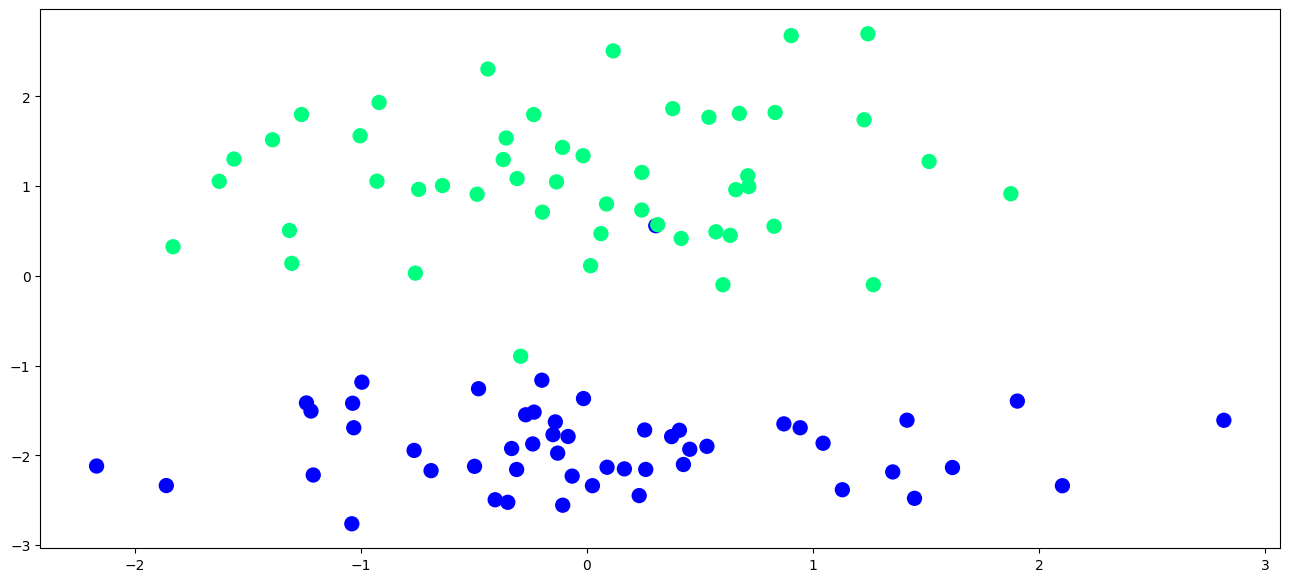

In [27]:
X ,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                        #    random_state=41,
                           hypercube=False,
                           class_sep=10
                           )
# visualizing dataset
plt.figure(figsize=(16,7))
plt.scatter(x=X[:,0],y=X[:,1],s=100,c=y,
            cmap='winter'
            )

In [28]:


def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]


def step(z):
    return 1 if z>0 else 0
        

In [29]:
intercept_,coef_ = perceptron(X,y)

In [30]:

print(coef_)
print(intercept_)

[-0.0737826   0.44785792]
0.40000000000000013


In [31]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

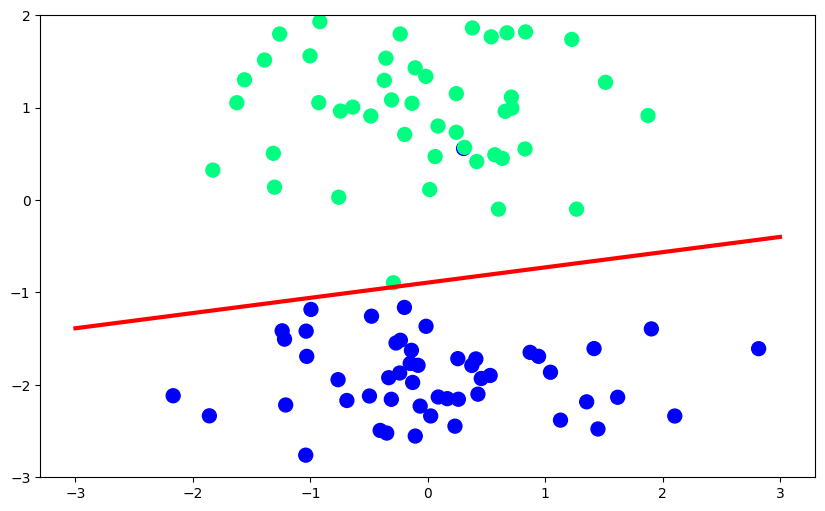

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [35]:
percept = Perceptron()
percept.fit(X_train,y_train)


Perceptron()

In [36]:
coef = percept.coef_[0]
coef

array([0.33872799, 1.60833777])